In [81]:
# Import  liraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [82]:
#load the data
df = pd.read_csv('girls_names.csv')

/var/folders/nc/pbf0pj7114jg0dltbbtyzj0m0000gn/T/ipykernel_53266/668718138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Decade'] = ((df_filtered["Year/Année"] // 10) * 10).astype(int).astype(str) + 's'


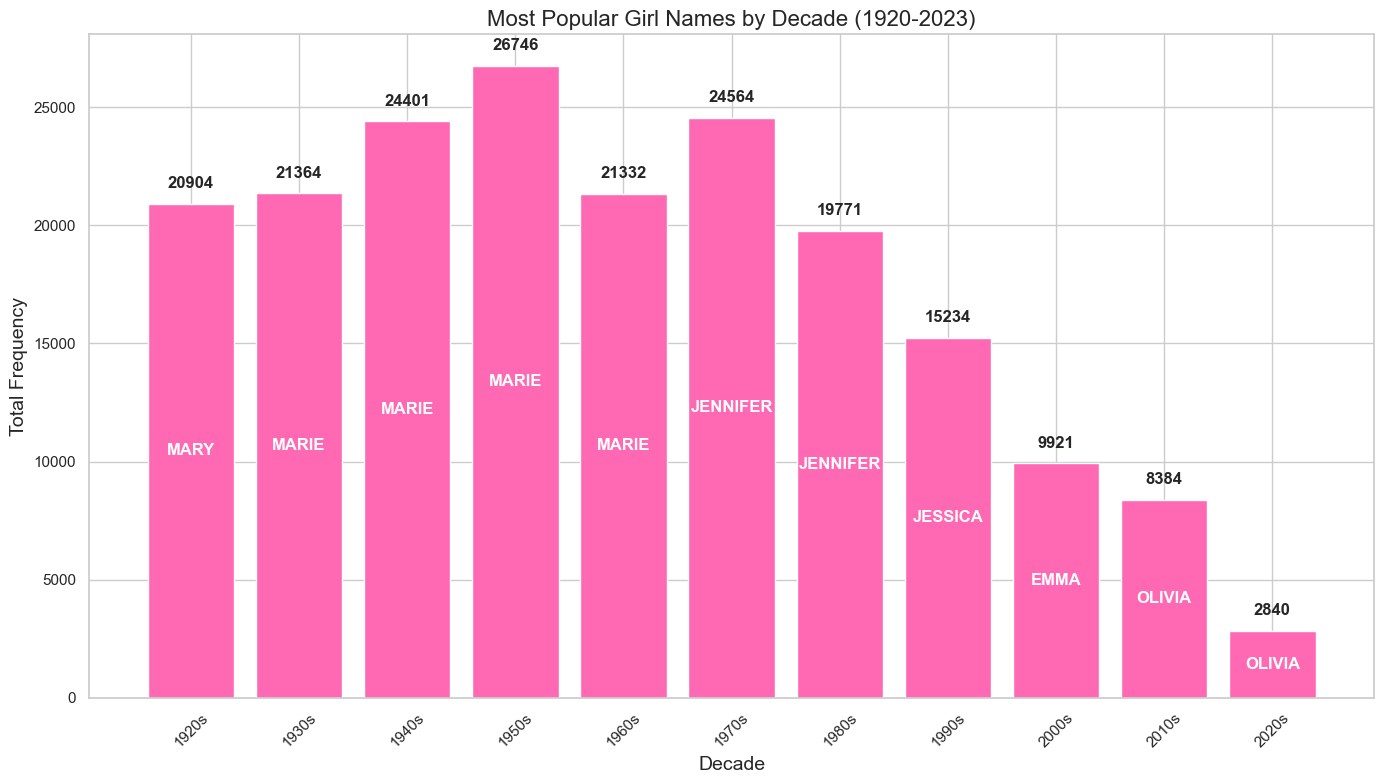


Total Results:
Decade Most Popular Name  Total Frequency
 1920s              MARY            20904
 1930s             MARIE            21364
 1940s             MARIE            24401
 1950s             MARIE            26746
 1960s             MARIE            21332
 1970s          JENNIFER            24564
 1980s          JENNIFER            19771
 1990s           JESSICA            15234
 2000s              EMMA             9921
 2010s            OLIVIA             8384
 2020s            OLIVIA             2840


In [83]:
# Filter for years 1920-2023, create a column for each decade
df_filtered = df[(df["Year/Année"] >= 1920) & (df["Year/Année"] <= 2023)]
df_filtered['Decade'] = ((df_filtered["Year/Année"] // 10) * 10).astype(int).astype(str) + 's'

# Calculate a total frequency of each name in each decade and find the most common one
decade_name_freq = df_filtered.groupby(['Decade', 'Name/Nom'])['Frequency/Fréquence'].sum().reset_index()
most_popular_names = decade_name_freq.loc[decade_name_freq.groupby('Decade')['Frequency/Fréquence'].idxmax()]

# Sort by decade
most_popular_names = most_popular_names.sort_values(by='Decade').reset_index(drop=True)

# Create the plot
plt.figure(figsize=(14, 8))
decades = most_popular_names['Decade'].tolist()
x_positions = range(len(decades))
x_labels = decades
frequencies = most_popular_names['Frequency/Fréquence'].tolist()

bars = plt.bar(x_positions, frequencies, color="hotpink", width=0.8)

# Add data labels
for i in range(len(decades)):
    name = most_popular_names.iloc[i]['Name/Nom']
    freq = most_popular_names.iloc[i]['Frequency/Fréquence']
    
    plt.text(i, freq/2, name, ha='center', va='center', color='white', fontweight='bold')
    plt.text(i, freq + max(frequencies)*0.02, f"{int(freq)}", ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.title("Most Popular Girl Names by Decade (1920-2023)", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Total Frequency", fontsize=14)
plt.xticks(x_positions, x_labels, rotation=45)

plt.tight_layout()
plt.show()

# Create a summary table
summary_df = pd.DataFrame({
    'Decade': most_popular_names['Decade'],
    'Most Popular Name': most_popular_names['Name/Nom'],
    'Total Frequency': most_popular_names['Frequency/Fréquence'].astype(int)
})

print("\nTotal Results:")
print(summary_df.to_string(index=False))